In [39]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'computer'
# rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
#                                'Lucida Grande', 'Verdana']

## Planning case 1

In [40]:
data = []
for i in [100, 200, 500]:
    data.append(np.load('res_{}_case_1.npy'.format(i))[()])

print(len(data))

# result optimization N = 15, tol=1e-6 planning case 2
# opt_cost = [0.9618131581981154, 0.9618128699747458, 0.9614996892761914, 0.9603557778047711, 0.9617651249576258, 0.961822323671103, 0.9621623439228587, 0.9618131127279967, 0.9620197606468074, 0.9618547469650585]
# opt_time = [1.213575839996338, 0.6106669902801514, 1.5356709957122803, 0.8212785720825195, 1.2804656028747559, 1.1900231838226318, 0.6401724815368652, 1.7029070854187012, 1.5612285137176514, 1.0490164756774902]
# but setting up the problem also takes 2 seconds, take this into account?

opt_time = [1.2665421962738037, 4.483356714248657, 1.1520159244537354, 2.192708969116211, 1.5645105838775635, 4.402402400970459]
opt_cost = [0.9618131581981154, 30.8100621724387, 0.9898231976365531, 62.15105582439039, 69.60464179782984, 37.2638419636589]


3


In [41]:
cost_vs_time = []
max_iters = len(data[0]['times'])

def calc_cost(q):
    q = np.array(q)
    return np.sum((q[:-1, :] - q[1:, :])**2)

for di in data:
    for i, pi, ti in zip(range(max_iters), di['paths'], di['times']):
        cost_vs_time.append([ti * (i+1), calc_cost(pi)])

cost_vs_time = np.array(cost_vs_time)
cost_vs_time

array([[2.69526362e+00, 6.60517206e+00],
       [6.83175325e+00, 1.22824887e+00],
       [1.07213709e+01, 2.34970965e-01],
       [1.42943163e+01, 7.04492906e-02],
       [1.80080557e+01, 4.40861570e-02],
       [5.66699219e+00, 4.13073354e+00],
       [1.46466322e+01, 1.61775179e+00],
       [2.31812911e+01, 1.50755458e+00],
       [3.09834175e+01, 1.27555068e+00],
       [3.80079663e+01, 1.18444528e+00],
       [1.46074889e+01, 1.26607694e+00],
       [3.82078705e+01, 1.30799658e-01],
       [5.92316873e+01, 3.48082092e-02],
       [8.23133993e+01, 2.43883187e-02],
       [1.01865233e+02, 2.04736665e-02]])

(0, 30)

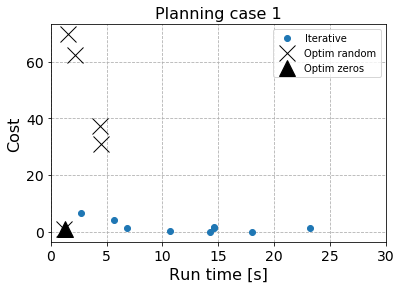

In [42]:
fig, ax = plt.subplots()
ax.plot(cost_vs_time[:, 0], cost_vs_time[:, 1], 'o')

ax.plot(opt_time[1:], opt_cost[1:], 'kx', markerSize='16')
ax.plot(opt_time[0], opt_cost[0], 'k^', markerSize='16')

ax.set_title('Planning case 1', fontSize='16')
ax.set_xlabel('Run time [s]', fontSize='16')
ax.set_ylabel('Cost', fontSize='16')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(['Iterative', 'Optim random', 'Optim zeros'])
ax.grid(linestyle='--')

ax.set_xlim([0, 30])

## Planning case 2

In [43]:
data = []
for i in [100, 200, 500]:
    data.append(np.load('res_{}_case_2.npy'.format(i))[()])

print(len(data))

# result optimization N = 15, tol=1e-6 planning case 2
opt_cost = 17.132204097375773
opt_time = 3.112861156463623  # but setting up the problem also takes 2 seconds, take this into account?

3


In [44]:
cost_vs_time = []
max_iters = len(data[0]['times'])

def calc_cost(q):
    q = np.array(q)
    return np.sum((q[:-1, :] - q[1:, :])**2)

for di in data:
    for i, pi, ti in zip(range(max_iters), di['paths'], di['times']):
        cost_vs_time.append([ti * (i+1), calc_cost(pi)])

cost_vs_time = np.array(cost_vs_time)
cost_vs_time

array([[  3.16004801,  34.954455  ],
       [  8.52652788,  13.4779945 ],
       [ 13.40340686,   9.22345596],
       [ 18.30148602,   8.63004549],
       [ 23.21460605,   8.43405192],
       [  6.19603491,   4.14620928],
       [ 16.55632496,   2.4093621 ],
       [ 26.97428226,   1.94821213],
       [ 37.23291397,   1.89724374],
       [ 47.6192677 ,   1.8550673 ],
       [ 15.99004436,   4.61002469],
       [ 42.79349232,   1.39218393],
       [ 66.63658547,   0.84785042],
       [ 94.25236702,   0.53616967],
       [119.62643862,   0.57859045]])

(0, 120)

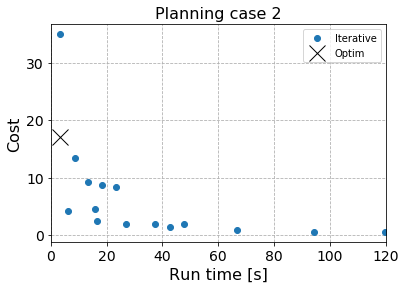

In [45]:
fig, ax = plt.subplots()
ax.plot(cost_vs_time[:, 0], cost_vs_time[:, 1], 'o')
ax.plot(opt_time, opt_cost, 'kx', markerSize='16')

ax.set_title('Planning case 2', fontSize='16')
ax.set_xlabel('Run time [s]', fontSize='16')
ax.set_ylabel('Cost', fontSize='16')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(['Iterative', 'Optim'])
ax.grid(linestyle='--')

ax.set_xlim([0, 120])